In [1]:
%reload_ext autoreload
%autoreload 2

from IPython.display import Image

# Load a proteomics library

In [2]:
# !pip install pydiaid

In [3]:
import pydiaid.synchropasef.loader_proteomics_library as loader_proteomics_library

In [6]:
library_name = r"D:\pydiaid\pydiaid\pydiaid\synchropasef\static\evidence_MaxQuant_270223.txt"
analysis_software = 'MaxQuant'
ptm = "None" #Options: 'None', 'Phospho', 'DiGly', ["STY"]

In [7]:
library = loader_proteomics_library.load_library(
        library_name,
        analysis_software,
        ptm,
    )

In [8]:
library

,mz,IM,Charge,Proteins,Peptide,IMlength
0,790.074949,1.135034,3,sp|P37108|SRP14_HUMAN,_AAAAAAAAAPAAAATAPTTAATTAATAAQ_,0.019912
1,478.779816,0.885198,2,sp|P36578|RL4_HUMAN,_AAAAAAALQAK_,0.038769
2,895.991600,1.238014,2,sp|Q96P70|IPO9_HUMAN,_(Acetyl (Protein N-term))AAAAAAGAASGLPGPVAQGLK_,0.049322
3,642.821886,1.014905,2,sp|P28482|MK01_HUMAN,_(Acetyl (Protein N-term))AAAAAAGAGPEMVR_,0.024167
4,659.806433,1.008862,2,sp|Q7L5D6|GET4_HUMAN,_(Acetyl (Protein N-term))AAAAAMAEQESAR_,0.016121
...,...,...,...,...,...,...
22585,702.867151,1.057111,2,sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN,_YYVTIIDAPGHR_,0.124890
22586,636.671988,0.921844,3,sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN,_YYVTIIDAPGHRDFIK_,0.030493
22587,477.755810,0.827934,4,sp|P68104|EF1A1_HUMAN;sp|Q5VTE0|EF1A3_HUMAN,_YYVTIIDAPGHRDFIK_,0.016403
22588,934.406374,1.137024,2,sp|Q9H501|ESF1_HUMAN,_YYYAVVDCDSPETASK_,0.023890


# Define where the output should be saved

In [24]:
import pydiaid.synchropasef.method_creator as method_creator
folder_paths = "D:\synchro_scan_test"
method_creator.create_folder([folder_paths])

# Create static plot

In [25]:
import pydiaid.synchropasef.plots as plots

In [26]:
xi, yi, zi = plots.kernel_density_calculation(library, 50)

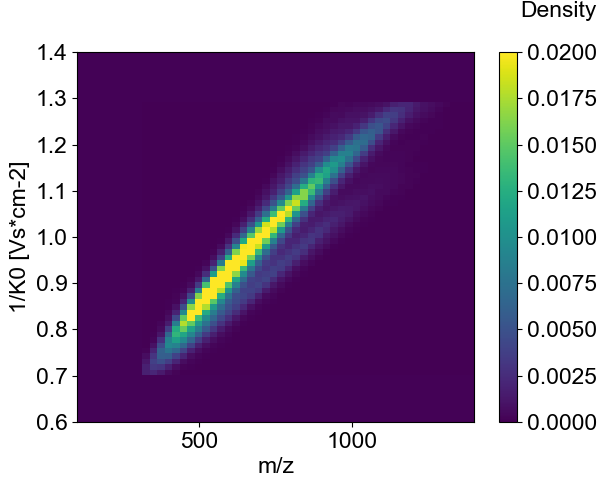

In [27]:
plot_parameters = {
    "plot_mz": [100, 1400],
    "plot_IM": [0.60, 1.4],
}


plots.density_plot(
    xi,
    yi,
    zi,
    plot_parameters,
    #"white_scheme"
    folder_paths + "density_plot.png"
)
# Image(folder_paths + "density_plot.png")

# Define scan area

In [28]:
import pydiaid.synchropasef.method_creator as method_creator
import pydiaid.synchropasef.method_evaluator as method_evaluator

In [29]:
scan_area= {
    "charge_state": [
        2,
        3
    ],
    "scan_area_width": 300,
}

scan_area_width = scan_area["scan_area_width"]
charge_state = scan_area["charge_state"]

In [30]:
scan_area_definition = method_creator.caclulate_scan_area_definitions(
    scan_area_width,
    charge_state,
    library
)
scan_area_definition

original scan area [(-350.0, 0.3877685793245741), (1610.0, 1.6800081671134248), (-50.0, 0.3877685793245741), (1910.0, 1.6800081671134248)]
please wait
coverage_tests     shift_in_mz  coverage
0           -50  0.913658
1           -45  0.919097
2           -40  0.924810
3           -35  0.930570
4           -30  0.935232
5           -25  0.939574
6           -20  0.943825
7           -15  0.948761
8           -10  0.953652
9            -5  0.957674
10            0  0.960005
11            5  0.962154
12           10  0.963845
13           15  0.965079
14           20  0.966222
15           25  0.965993
16           30  0.964713
17           35  0.962337
18           40  0.959594
19           45  0.956212
20           50  0.952921
best_shift 20


[(-330.0, 0.3877685793245741),
 (1630.0, 1.6800081671134248),
 (-30.0, 0.3877685793245741),
 (1930.0, 1.6800081671134248)]

# Plot and evaluate scan area

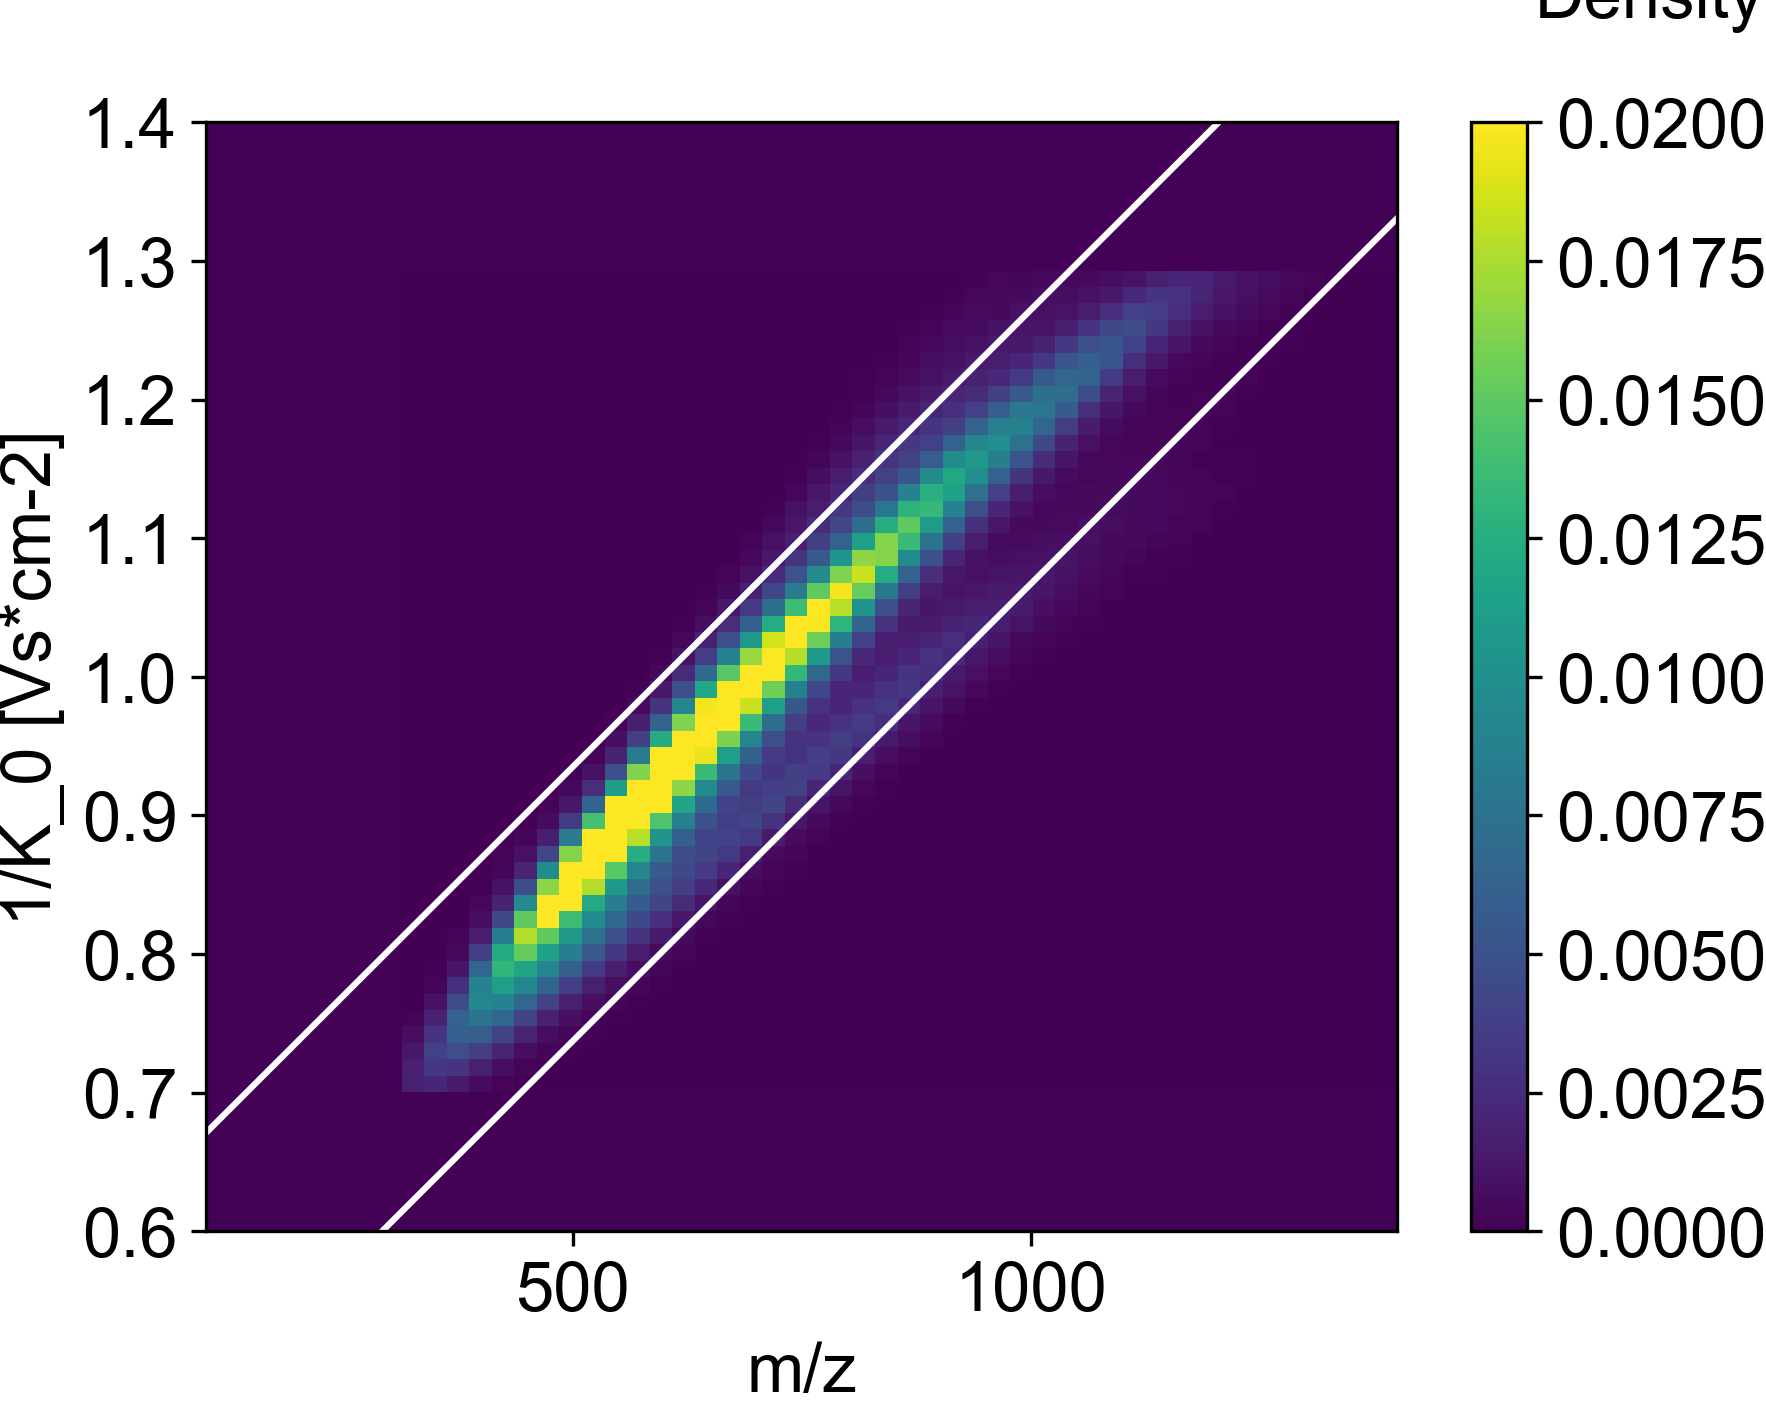

<Figure size 640x480 with 0 Axes>

In [31]:
plots.density_plot_plus_scan_area(
    xi,
    yi,
    zi,
    plot_parameters,
    folder_paths + "density_plot.png",
    scan_area_definition,
)
Image(folder_paths + "density_plot.png")

In [32]:
import pydiaid.synchropasef.method_evaluator as method_evaluator

In [33]:
library_coverage = library.copy()
coverage_center = method_evaluator.coverage_calculated_at_center(library_coverage, scan_area_definition)
coverage_center

0.9662217752993875

# Create a synchroscan method

### parameters

window_type: equidistant, variable, pre-definied

scan_mode: 'classical_synchro-PASEF', 'highly_accurate_synchro-PASEF', 'individual_synchro-PASEF'

window_modification: 'staggered', 'overlap', 'None'

window_overlap: required for overlap, overlap per window

no_of_combined_scans: required for staggered and classical synchro-PASEF

window_pattern: required for individual_synchro-PASEF: 
structure it like this: [[0, 2], [3,5], [6, 8], [9,12], [12,14]] 
-> scans = 15, scan_ratio = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [44]:
import pydiaid.synchropasef.method_creator as method_creator

In [63]:
save_at = r"D:\synchro_scan_test"

scan_area_dict = {
    "charge_state": scan_area["charge_state"], 
    "scan_area_width": scan_area["scan_area_width"],
    "scan_area": scan_area_definition,
    # "scan_area": [(-267.5, 0.38776857932457387), (1692.5, 1.6800081671134246), (-142.5, 0.38776857932457387), (1817.5, 1.6800081671134246)]
}

method_parameters = {
    "scans": 3,
    "window_type": "equidistant",
    "scan_ratio": [1, 1, 1, 1, 1],
    "scan_mode":  'classical_synchro-PASEF',
    "window_modification":  'None',
    "window_overlap": 0.2,
    "no_of_combined_scans": 3,
    "window_pattern": [[0, 2], [3,5], [6, 8], [9,12], [12,14]],
}
method_parameters_general = {
    "MS1_positions": [1],
    "dict_im_limits": {'low_limit_IM': 0.7,'up_limit_IM': 1.3}
}

_ = method_creator.create_method(
    save_at,
    scan_area_dict["scan_area"],
    method_parameters,
    method_parameters_general,
    library
)

# Load Synchro-PASEF Method

In [64]:
import pydiaid.synchropasef.loader_MS_parameter_file as loader_MS_parameter_file

In [65]:
open_name = r"D:\synchro_scan_test\synchroPasef.txt"

df_parameters_final = loader_MS_parameter_file.load_MS_method_from_txt_file(
    open_name,
)
df_parameters_final

,type,mobility pos.1 [1/K0],mass pos.1 start [m/z],mass pos.1 end [m/z],mobility pos.2 [1/K0],mass pos.2 start [m/z]
0,ms,-,-,-,-,-
1,vista,0.7,143.6,243.6,1.3,1053.6
2,vista,0.7,243.6,343.6,1.3,1153.6
3,vista,0.7,343.6,443.6,1.3,1253.6


# Evaluate Synchro-PASEF Method

In [66]:
import pydiaid.synchropasef.plots as plots

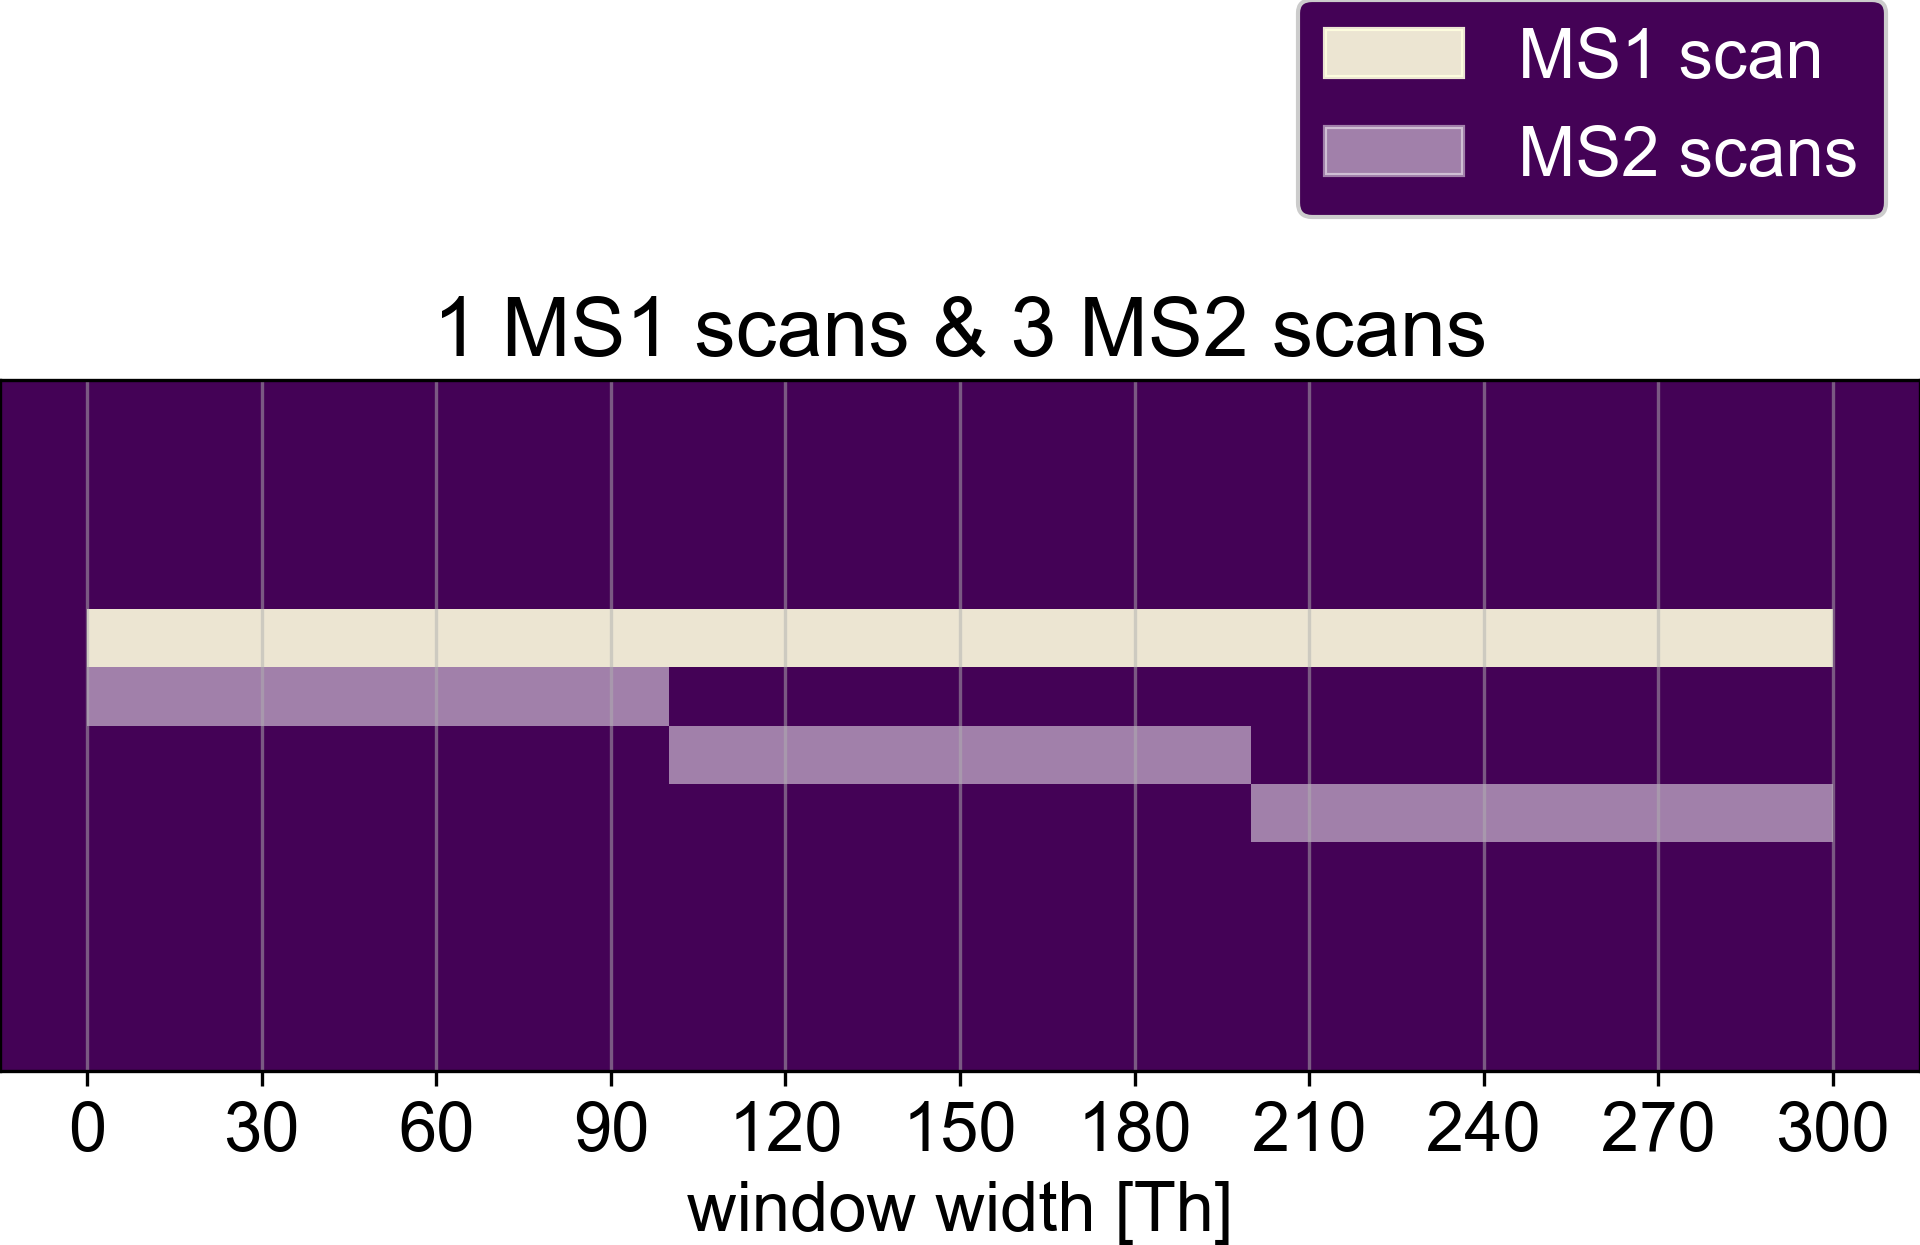

<Figure size 640x480 with 0 Axes>

In [74]:
plots.plot_acquisition_scheme(
    df_parameters_final,
    folder_paths + "/acquisition_scheme.png"
)
Image(folder_paths + "/acquisition_scheme.png")

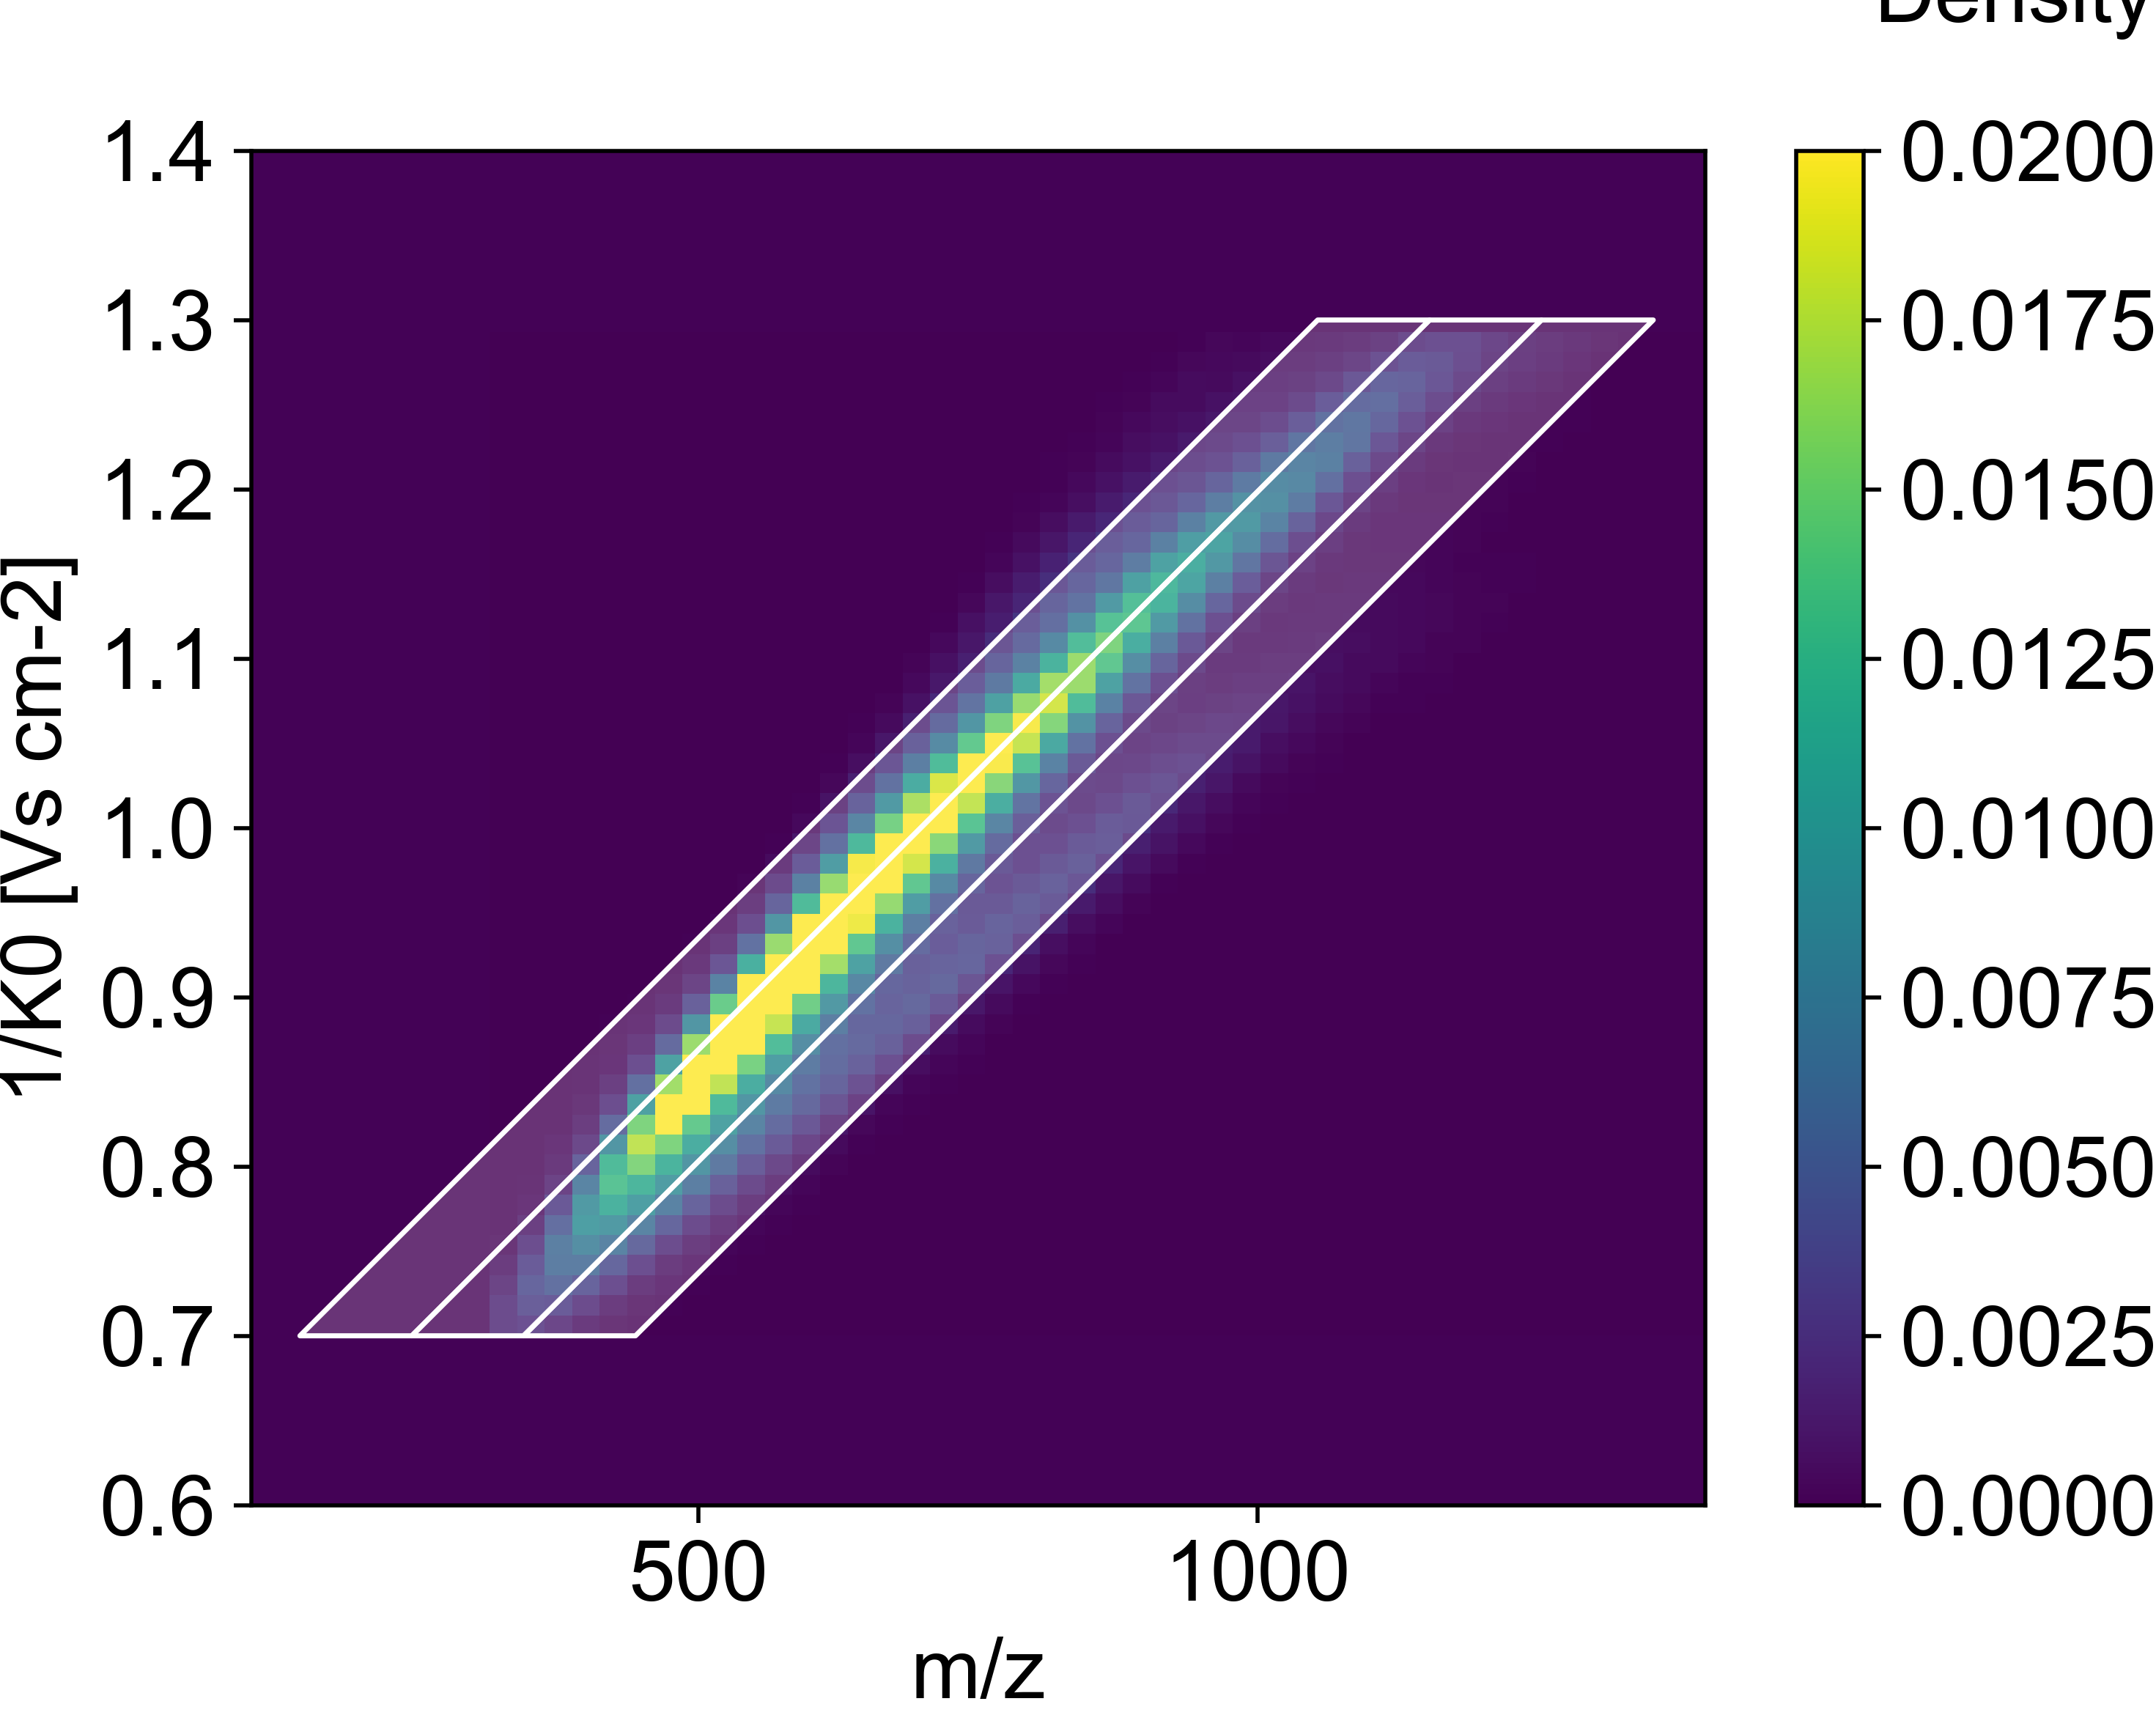

<Figure size 640x480 with 0 Axes>

In [75]:
plots.plot_method_and_precursors(
    xi,
    yi,
    zi,
    {'plot_mz': [100, 1400], 'plot_IM': [0.6, 1.4]},
    df_parameters_final,
    folder_paths + "/acquisition_scheme_and_density_plot_polygone.png",
#     alpha=0.1,
#     window_color = "green",
#     color_scheme_name = "white_scheme"
)
Image(folder_paths + "/acquisition_scheme_and_density_plot_polygone.png")

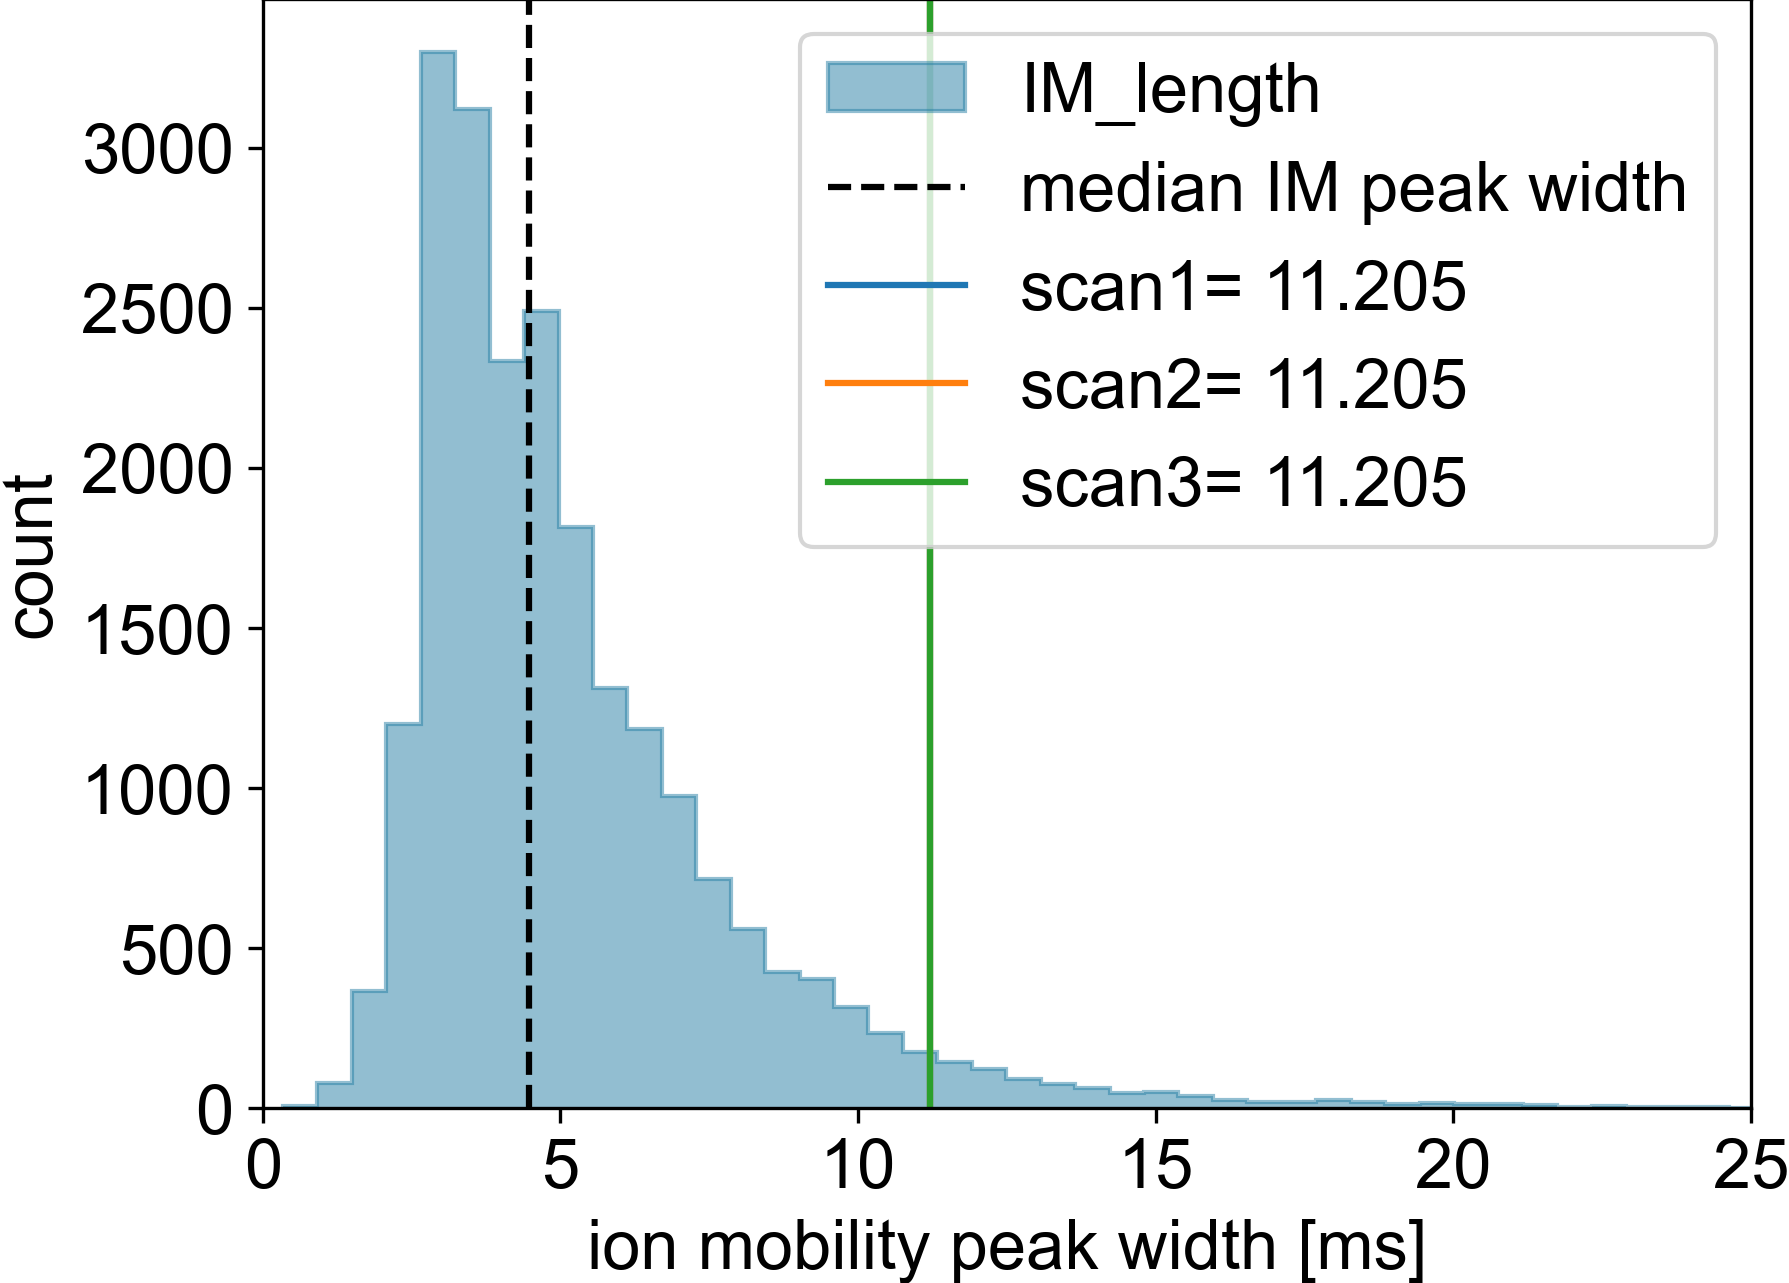

<Figure size 640x480 with 0 Axes>

In [77]:
# optinal settings only applicable if library contains ion mobility length information for only this plot
acquisition_parameters = {
    "IM": [0.7, 1.3], # take from method generation
    "ramp_steps": 927,
}

if "IMlength" not in library.columns:
    next
elif acquisition_parameters["ramp_steps"]!="None":
    plots.histogram_precursor_slicing(
        400, 
        library,
        acquisition_parameters,
        df_parameters_final,
        folder_paths + "/histogram_slicing.png"
    )
Image(folder_paths + "/histogram_slicing.png")

In [78]:
import pandas as pd

if "IMlength" not in library.columns:
    df_evaluated, _ = method_evaluator.calculate_coverage_total_per_scan_per_charge_state(df_parameters_final, library)
else:
    df_coverage, df_temp = method_evaluator.calculate_coverage_total_per_scan_per_charge_state(df_parameters_final, library)
    df_slicing = method_evaluator.calculate_slicing_and_coverage_in_total(library, df_temp)
    df_evaluated = pd.concat([df_coverage, df_slicing])
df_evaluated

,all synchro scans,#synchro scan 1,#synchro scan 2,#synchro scan 3
unique proteins in the library,3874,3874,3874,3874
unique precursors in the library,21878,21878,21878,21878
No. of covered proteins,3850,2461,3300,1429
No. of covered precursors,21139,6435,12266,2438
"No. of covered, singly charged precursors",1,0,1,0
"No. of covered, doubly charged precursors",14264,5760,8368,136
"No. of covered, triply charged precursors",6130,573,3368,2189
"No. of covered, quadruply charged precursors",744,102,529,113
proteins covered [%],99.4,63.5,85.2,36.9
precursors covered [%] (counting IM peak at center),96.6,29.4,56.1,11.1


## make gif

In [79]:
import os
import imageio.v3 as iio

In [86]:
save_at = 'D:/synchro_scan_gif/'
method_creator.create_folder([save_at])

boxes, df_temp_reset_index = plots.generate_boxes(df_parameters_final, im_steps=3)

plots.generate_gif_single_windows(
    xi,
    yi,
    zi,
    plot_parameters,
    boxes,
    range(1, len(df_temp_reset_index)+1),
    save_at,
    facecolor="#FF0098",
    window_color = "white_grey",
    scans_plotted_at_once=1,
)

<Figure size 640x480 with 0 Axes>

In [87]:
png_dir = r"D:\synchro_scan_gif/"

In [88]:
png_dir = save_at[:-1]
print(save_at[:-1])
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(iio.imread(file_path))
iio.imwrite(save_at + 'SynchroScan_single_windows.gif', images, duration = 0.001, loop = 0)


D:/synchro_scan_gif
